# Final Project Submission
Please fill out:

1-Student name: Mays Alkhwitar

2-Student pace: flex

3-Scheduled project review date/time: 

4-Instructor name: Mark Barbour

5-Blog post URL:https://

# Predicting Alzheimer's Disease by classifying MRI Images



## Project Overview

Through this project, We will build a classifier model to analyze a set of brain MRI Images for detecting Alzheimer's Disease.The model can classify the data based on reading the brain MRI Images. Create a predictive classification model that makes it possible to understand the business problem, solve it and report the findings of the final 

## Business Problem 

Alzheimer disease (AD) is an irreversible brain degenerative disorder affecting people aged older than 65 years. Currently, there is no effective cure for AD, but some treatments can delay its progression. Accurate and early diagnosis of AD is vital for patient care and the development of future treatment.

The main motive behind the project is developing a classification model for detecting AlzheimerDisease to help Alzheimer’s researchers in New york Alzheimer’s center-continue to pursue drug treatments for the disease, most agree that successful treatment will hinge on early detection and on finding ways to head off brain damage before the later stages of Alzheimer’s .



## Data Understanding

This project uses the [Alzheimer MRI dataset from Kaggle](https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset), The Data is collected from several websites/hospitals/public repositories.
The Dataset consists of a total of 6400 MRI images. the images are simply stored in .jpeg files and stored under the folder '/Dataset'.All the images are resized into 128 x 128 pixels.
the target is divided into four classes :

Class - 1: Mild Demented (896 images)

Class - 2: Moderate Demented (64 images)

Class - 3: Non-Demented (3200 images)

Class - 4: Very Mild Demented (2240 images)





## Data Preparation

Image classification algorithms are trained and tested using image datasets.Supervised models are trained and tested using labeled image datasets.

Another common use of image datasets is as a benchmark for computer vision algorithms. Applying multiple algorithms to the same dataset can be an effective way to compare their performance for a given task.

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt

After imported all the necessary libraries and functions , we'll need to get the dataset.

### Importing the dataset

Let's start by importing the dataset from the directory.

In [2]:
# Create a folder in which you add the images
DATADIR = "Dataset"


DATADIR is a string assigned to the file path containing the training data.

In [3]:
# folders of each class of images
CATEGORIES = ["Mild_Demented","Moderate_Demented","Non_Demented","Very_Mild_Demented"]

In [4]:
CATEGORIES

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

Next,create a loop to reach the images of the four categories

The os.path.join method joins the paths, so the file path to the training data (DATADIR) is joined with the categories. 

cv2.imread() loads an image from the joint file path (training path and categories).

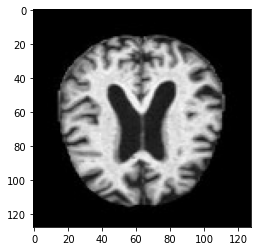

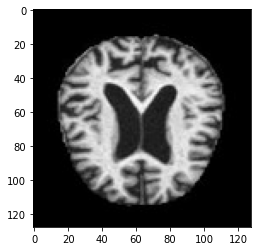

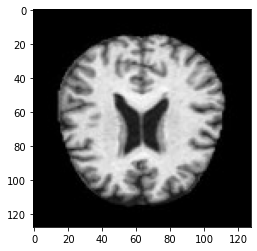

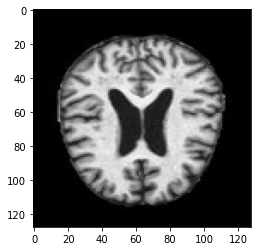

In [5]:
# loop to reach the catogory of the four categories
for category in CATEGORIES:
    # create a path for each class
    path = os.path.join(DATADIR,category )
    # loop to reach the image of the four categories
    for img in os.listdir(path):
        #read the image
        img_array = cv2.imread(os.path.join(path,img))
        # display the image
        plt.imshow(img_array)
        plt.show()
        break
    


 Image is diplayed from each catogory.

In [6]:
#display the image array
print(img_array)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [7]:
# display the shape of image
print(img_array.shape)

(128, 128, 3)


The shape of image is (128, 128, 3). This particular image is the same shape,

### Preprocessing

We preprocessed each image by:

1-Resizing the image.

In [8]:
#new size
IMG_SIZE = 100

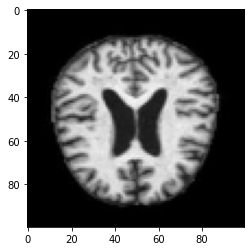

In [9]:
# resizing the image
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()



The image size changed from 128x128 to 100x100

In [10]:
len(CATEGORIES)

4

In [11]:
DATADIR

'Dataset'

Next, create a function to match the image with the category to which the image belongs to it. An index loop will be used to match a photo to each category. The next for loop, as previously mentioned, iterate through the images in the file path. listdir() will return a list of images. cv2.imread() loads an image from the joint file path. AAll this is appended to training data, in a list, because the append method only takes in one argument, and the list allows us to hold two.

In [12]:
# create a function to match the image and the catogory
def Data():
    data = []
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            data.append([new_array, class_num])
    return data
data = Data()

In [13]:
data

[[array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         ...,
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],
  
         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]], dtype=uint8),
  0],
 [array([[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 

To find the length of the data, print the length.

In [14]:
len(data)

6400

2-Shuffling of data

Random shuffling of data is a standard procedure in all machine learning.When we say shuffle a list, it means a change in the order of list items.e.g putting all the images relatted to the spesific class first ,then the images relatted to the other class second and so on.

In [15]:
#shuffling of data 
from numpy import *
random.shuffle(data)

3- Assigning Labels and Features
 
This shape of both the lists will be used in Classification using the NEURAL NETWORKS.

We need to pair the arrays of the image with their labels.

In [16]:
# Assigning Labels and Features
X =[]
y =[]
for features, label in data:
    X.append(features)
    y.append(label)


### Checking for target distribution

In [17]:
#create a data frame
df = pd.DataFrame({'img':X, 'label':y})
df.head()

,img,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",3
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2


In [18]:
# target counts
df["label"].value_counts()

2    3200
3    2240
0     896
1      64
Name: label, dtype: int64

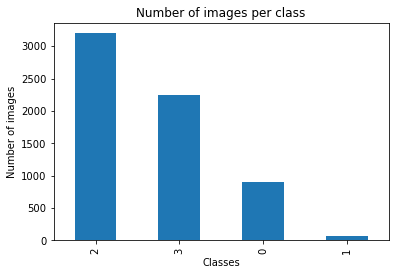

In [19]:
# visualize the target values
df["label"].value_counts().plot(kind='bar')
plt.title('Number of images per class')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.show()

We will try to apply any method to improve the poor performance caused by imbalanced 

In [20]:
# convert the featers list to array
X = np.array(X)
X

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

4-Reshaping the dimensions.

When we feed the images to keras, we need to reshape our dimensions.

In [21]:
# display X shape
X.shape

(6400, 100, 100, 3)

So we’ll use the x.reshape(-1, image_size, image_size, 1). The -1 means that the length in the dimension is inferred so we don’t have to specify it. The 1 is because we’re using a black-and-white picture so we’ll only have one layer of the image. To convert the shape of a NumPy array use the ndarray.reshape() method

In [22]:
# reshape x
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X

array([[[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        ...,

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]],


       [[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0,

6- Normalising X and converting labels to categorical data
In image classification we pull in images into an array of numbers. These numbers represent the pixel intensity, and it’s a number between 0 and 255, 255 being white and 0 being black.we can just divide every pixel by 255 that way we’re left with numbers between 0 and 1, 1 being white and 0 being black.

In [23]:
# Normalising X
X = X.astype('float32')
X /= 255
#from keras.utils import np_utils
#Y= np_utils.to_categorical(y, 4)

#print(Y[100])
#print(shape(Y))
print(shape(X))

(6400, 100, 100, 3)


6- Split X and Y to use in neural network models

A dataset is typically split into training , validation, and testing sets. For example, 80% of the images can be used to initially train the algorithm (the training set), and the remaining 20% can be used as unseen examples to test the algorithm’s performance (the testing set).

In [24]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [25]:
# split the train data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=4)

In [26]:
# display X_train,validation,and test
print(X_train,X_val,X_test)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [27]:
# display X_train shape
X_train.shape


(3840, 100, 100, 3)

X_train consists of 3,840 images that are 100x100".We'll need to reshape them from (100, 100), a 100x100 matrix, to (10000,), a 10000-element vector.

In [28]:
# display X_test shape
X_test.shape


(1280, 100, 100, 3)

X_test consists of 1,280 images that are 100x100".We'll need to reshape them from (100, 100), a 100x100 matrix, to (10000,), a 10000-element vector.

In [29]:
# display X_val shape
X_val.shape

(1280, 100, 100, 3)

X_val consists of 1,280 images that are 100x100".We'll need to reshape them from (100, 100), a 100x100 matrix, to (10000,), a 10000-element vector.

We will display some of train data images samples.

Label: 2


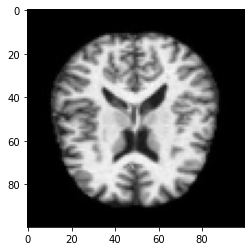

In [30]:
sample_image = X_train[500]
sample_label = y_train[500]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

Label: 2


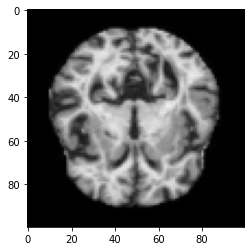

In [31]:
sample2_image = X_train[3000]
sample2_label = y_train[3000]
display(plt.imshow(sample2_image))
print('Label: {}'.format(sample2_label))

In [32]:
# display y_train for 25 position of y_train
y_train[:25]

[2, 2, 2, 2, 2, 0, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3, 3, 2]

As we can see, the labels for each digit image in the training set are stored as the corresponding integer value -- if the image is of a 3, then the corresponding label will be 3. This means that this is a Multiclass Classification problem, which means that we need to One-Hot Encode our labels before we can use them for training.

Keras provides to_categorical() to one-hot encode our labels

In [33]:
y_train = keras.utils.to_categorical(y_train, 4)
y_test = keras.utils.to_categorical(y_test, 4)
y_val = keras.utils.to_categorical(y_val, 4)


Great. Now, let's examine the label for the first data point, which we saw was 3 before.

In [34]:
y_train[0]

array([0., 0., 1., 0.], dtype=float32)

In [35]:
y_train[1]

array([0., 0., 1., 0.], dtype=float32)

In [36]:
y_train[2]

array([0., 0., 1., 0.], dtype=float32)

In [37]:
y_train[4]

array([0., 0., 1., 0.], dtype=float32)

We can notice that labels are  converted to one-hot encode.

In [38]:
#visualize_training_results(results_1)

That means the data  trained for many epochs past a certain dropoff point.

In [39]:
#test_loss, test_acc = model_1.evaluate(X_test,y_test)


## tune a model for optimal performance.

Regularization For neural networks, we use a L1,L2 in order to achieve well trained models that are neither overfit nor underfit.

Optimization look at alternative optimization algorithms.

Convolutional Neural Networks:
Convolutional Neural Networks are often preferred over densely connected networks for image processing

## Modeling

### Baseline Model

We'll build a Multi-Layer neural network to solve image classification. 

Keras can be used to build a neural network to solve a classification problem.

Keras is an API that sits on top of Google’s TensorFlow, Microsoft Cognitive Toolkit (CNTK), and other machine learning frameworks. The goal is to have a single API to work with all of those and to make that work easier.

Basically, a neural network is a connected graph of perceptrons. Each perceptron is just a function. In a classification problem, its outcome is the same as the labels in the classification problem. 

The Keras sequential model:this is the simplest type of data structure in Keras and is basically a sequence of connected layers in a network

In any neural network, a dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [41]:
#creates a Sequential model
model_1 = keras.models.Sequential(
[keras.layers.Flatten(input_shape =(100,100,3)) ,
keras.layers.Dense(10000, activation = "relu" ),
keras.layers.Dense(5000, activation = "relu" ),
keras.layers.Dense(2000, activation = "relu" ),
                                                                    
keras.layers.Dense(4, activation = "softmax" )])

The Multi-Layer neural network consist of :
    
1- Input Layer:The number of neurons comprising that layer is equal to the number of features (columns) in the data.
The raw pixel values of an image represented as a 3D matrix Dimensions W x H x D. , where depth corresponds to the number of color channels in the image.
The first layer in the model is a flatten layer and is there for pre-processing of the data and it isn’t trainable itself. What this does is take each 100 x 100 NumPy array for each image and flattens it into a 1 x 10000 array that the network can work with. in order to create a correctly-sized input layer!

2- Hidden layers:Following are the thumb-rules for building an MLP. However, most of them are applicable on other Deep Learning models.

Number of Layers: Start with two or three hidden layers (this does not include the last layer).

Number of nodes (size) of intermediate layers: a number from the geometric progression of 2, e.g., 4, 8, 16, 32, … . The first layer should be around half of the number of input data features. The next layer size as half of the previous.

In a neural network, the activation function is responsible for transforming the summed weighted input from the node into the activation of the node or output for that input.

relu introduces the property of non-linearity to a deep learning model and solves the vanishing gradients issue.

3- The output layer
Finally, we add a Dense layer with 4 neurons as there are 4 classes to predict and as they are all exclusive, we use the softmax activation function.

Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.



## Compile the model 
parameters:

loss='categorical_crossentropy'

optimizer='sgd'

metrics = ['acc']

In [42]:
# compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

The loss function to use. In this case we are using categorical_crossentropy.

categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

The optimizer we are going to use to optimise the model against the loss function is stochastic gradient descent and this will ensure the model converges on an optimum solution

Specify a metric that we are going to use in addition to loss to give us an idea of how well our model is working. In this case, we are using accuracy which gives an idea of how well our model is doing by giving a percentage of how many predictions match the actual class for the model we are training

### Inspect the shape of our model before training 

We can use model.summary() to print some information.

In [43]:
# model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 30000)             0         
_________________________________________________________________
dense (Dense)                (None, 10000)             300010000 
_________________________________________________________________
dense_1 (Dense)              (None, 5000)              50005000  
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              10002000  
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 8004      
Total params: 360,025,004
Trainable params: 360,025,004
Non-trainable params: 0
_________________________________________________________________


This network has a total of 360,025,004 trainable parameters (consisting of weights between neurons and bias terms) and this gives the network a lot of flexibility, but it also means that it will be very easy for it to overfit 

#### Fit the model on train set.

fit()—trains the model, meaning calculates the weights, biases, number of layers, etc.

epoch—means how many times to run the model. Remember that it is an iterative process.

metrics—means what metrics to display as it runs. Accuracy means how accurately the evolving model predicts the outcome.

batch size—n means divide the input data into n batches and process each in parallel.



In [44]:
# Fit the model on train set
results_1 = model_1.fit(X_train, y_train,
                        epochs=25, 
                        batch_size=128, 
                        validation_data=(X_val, y_val))


Epoch 1/25
30/30 [==============================] - 165s 5s/step - loss: 1.2779 - acc: 0.4612 - val_loss: 0.9767 - val_acc: 0.5055
Epoch 2/25
30/30 [==============================] - 164s 5s/step - loss: 0.9761 - acc: 0.5125 - val_loss: 0.9360 - val_acc: 0.5594
Epoch 3/25
30/30 [==============================] - 170s 6s/step - loss: 0.9506 - acc: 0.5500 - val_loss: 0.9744 - val_acc: 0.5055
Epoch 4/25
30/30 [==============================] - 170s 6s/step - loss: 0.9323 - acc: 0.5542 - val_loss: 0.9141 - val_acc: 0.5352
Epoch 5/25
30/30 [==============================] - 170s 6s/step - loss: 0.9141 - acc: 0.5677 - val_loss: 0.9172 - val_acc: 0.5734
Epoch 6/25
30/30 [==============================] - 172s 6s/step - loss: 0.9128 - acc: 0.5711 - val_loss: 0.8750 - val_acc: 0.5914
Epoch 7/25
30/30 [==============================] - 169s 6s/step - loss: 0.8930 - acc: 0.5766 - val_loss: 0.8669 - val_acc: 0.6086
Epoch 8/25
30/30 [==============================] - 166s 6s/step - loss: 0.8713 - a

The batch_size and epochs are the main hyperparameters of the gradient descent algorithm. We specified them in the fit() methods of the model

The number of epoch will decide- how many times we will change the weights of the network. As the number of epochs increases, the same number of times weights are changed in the neural network and the boundary goes from underfitting to optimal to overfitting.

Batch Size is among the important hyperparameters in Machine Learning. defines the number of samples to work through before updating the internal model parameters. The primary metric that we care about, Batch Size has an interesting relationship with model loss. increasing batch size lowers performance. adding to the batch size reduces the validation loss. The batch_size accepts an integer or None. When Noneor unspecified, it will default to 32. Other popular integers for the batch_size are 16, 64, 128 and 256.

### Model Performance
The attribute .history (stored as a dictionary) contains four entries now: one per metric that was being monitored during training and validation.

In [45]:
history = results_1.history
history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Visualizing our Loss and Accuracy Curves

Create a function to help us ploting the metrics

In [46]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

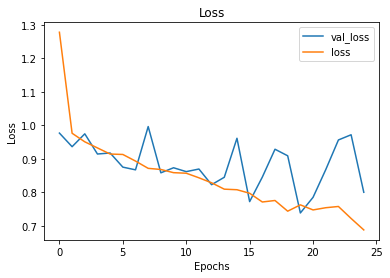

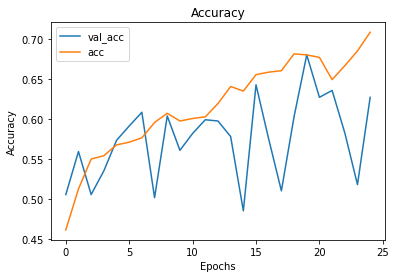

In [47]:
# call the visualizing function
visualize_training_results(results_1)

Training accuracy keeps increasing when going through more epochs.and the training loss keeps decreasing, which means that the model is  probably overfitting.

validation loss keeps decreasing as well as validation accuracy.

### Evaluate this model on the test data:

In [48]:
# Evaluate the model
test_loss, test_acc = model_1.evaluate(X_test,y_test)


40/40 [==============================] - 69s 2s/step - loss: 0.8280 - acc: 0.6117


The model is overfitting

### Tune a model for optimal performance.

Regularization For neural networks, we use a L1,L2,Dropout Regularization in order to achieve well trained models that are neither overfit nor underfit.

Optimization look at alternative optimization algorithms.

Convolutional Neural Networks: Convolutional Neural Networks are often preferred over densely connected networks for image processing in order to achieve well trained models that are neither overfit nor underfit.


### The second model:Dropout Regularization

Dropout Regularization means a random subset of nodes in a layer are ignored.
The Dropout layers requires one argument, rate, which specifies the fraction of units to drop, usually between 0.2 and 0.5.

In [49]:
#creates a Sequential model
#model_2 = keras.models.Sequential(
    #[keras.layers.Flatten(input_shape =(100,100,3)) ,
#keras.layers.Dense(10000, activation = "relu" ),
#keras.layers.Dropout(0.3),                   
#keras.layers.Dense(5000, activation = "relu" ),
#keras.layers.Dropout(0.3),                                   
#keras.layers.Dense(2000, activation = "relu" ),
#keras.layers.Dropout(0.3),                                   
                                                               
#keras.layers.Dense(4, activation = "softmax" )])

In different iterations through the training set, different nodes will be zeroed out!

In [50]:
# the model summary 
#model_2.summary()

In [51]:
# compile the model
#model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [52]:
# fit the model on training set.
#results_2 = model_2.fit(X_train, y_train,
                        #epochs=25, 
                        #batch_size=128, 
                        #validation_data=(X_val, y_val))


In [53]:
#history = results_2.history
#history.keys()

In [54]:
# call the visualizing function
#visualize_training_results(results_2)

Training accuracy keeps increasing when going through more epochs.and the training loss keeps decreasing, which means that the model is probably overfitting.
validation accuracy keeps swinging. 
Training loss keeps decreasing,validation loss keeps swinging .

### Evaluate this model on the test data:

In [55]:
# Evaluate the model
#test_loss, test_acc = model_2.evaluate(X_test,y_test)


The model is overfitting.

### Third model : Optimization look at alternative optimization algorithms.

In [56]:
#creates a Sequential model
#model_3 = keras.models.Sequential([keras.layers.Flatten(input_shape =(100,100,3)) ,
#keras.layers.Dense(10000, activation = "relu" ),
#keras.layers.Dropout(0.3),                   
#keras.layers.Dense(5000, activation = "relu" ),
#keras.layers.Dropout(0.3),                                   
#keras.layers.Dense(2000, activation = "relu" ),
#keras.layers.Dropout(0.3),                                   
                                                               
#keras.layers.Dense(4, activation = "softmax" )])

In [57]:
# model summary
#model_3.summary()

Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models for computer vision .
Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

In [58]:
# model compile
#model_3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [59]:
# fit the model on the training data set
#results_3 = model_3.fit(X_train, y_train,
                        #epochs=25, 
                        #batch_size=128, 
                        #validation_data=(X_val, y_val))


In [60]:
# visualization function
#visualize_training_results(results_3)

### Model 4: convolutional neural network 
convolutional neural network models are work phenomenally well on computer vision tasks like image classification, object detection, image recognition,

the images fed to these networks must be converted to a numerical representation.

convolutional neural network has two types of layers:Convolution,Padding
 
Convolution :reduceing the size of the numerical representation sent to the CNN.only features that are important in classifying an image are sent to the neural network by applying a filtter.
which is usually 3*3 matrix.This is done by sliding the kernel on the input image. The sliding happens in steps known as strides.    
 

Padding:Padding involves increasing the size of the input image by “padding” the images with zeros. As a result, applying the filter to the image leads to a feature map of the same size as the input image. 

 (ReLU) transformation is applied after every convolution operation to ensure non-linearity.After the transformation, all values below zero are returned as zero while the other values are returned as they are. 

  

In [61]:
from tensorflow.keras import layers, models

In [62]:
# create a Convolution network
model_4 = models.Sequential()
model_4.add(layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3))),
model_4.add(layers.MaxPooling2D((2, 2))),

model_4.add(layers.Conv2D(64, (3, 3), activation='relu')),
model_4.add(layers.MaxPooling2D((2, 2))),
model_4.add(layers.Dropout(0.25)),
            
model_4.add(layers.Conv2D(64, (3, 3), activation='relu')),
model_4.add(layers.MaxPooling2D((2, 2))),
model_4.add(layers.Dropout(0.25)),
            
model_4.add(layers.Flatten()),
            
model_4.add(layers.Dense(64, activation='relu')),
model_4.add(layers.Dense(4, activation='softmax'))
            


In [63]:
# model summary
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)       

In [64]:
# compile model
model_4.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [65]:
# fit the model on the training dataset
results_4 = model_4.fit(X_train, y_train,
                        epochs=25, 
                        batch_size=128, 
                        validation_data=(X_val, y_val))


Epoch 1/25
30/30 [==============================] - 112s 4s/step - loss: 1.0610 - acc: 0.4763 - val_loss: 1.0474 - val_acc: 0.4930
Epoch 2/25
30/30 [==============================] - 109s 4s/step - loss: 1.0168 - acc: 0.5078 - val_loss: 1.0175 - val_acc: 0.5531
Epoch 3/25
30/30 [==============================] - 109s 4s/step - loss: 0.9657 - acc: 0.5336 - val_loss: 0.9532 - val_acc: 0.5570
Epoch 4/25
30/30 [==============================] - 109s 4s/step - loss: 0.9160 - acc: 0.5711 - val_loss: 0.8982 - val_acc: 0.5953
Epoch 5/25
30/30 [==============================] - 108s 4s/step - loss: 0.8881 - acc: 0.5844 - val_loss: 0.9038 - val_acc: 0.5992
Epoch 6/25
30/30 [==============================] - 109s 4s/step - loss: 0.8643 - acc: 0.6055 - val_loss: 0.8514 - val_acc: 0.6266
Epoch 7/25
30/30 [==============================] - 108s 4s/step - loss: 0.8203 - acc: 0.6268 - val_loss: 0.8087 - val_acc: 0.6438
Epoch 8/25
30/30 [==============================] - 108s 4s/step - loss: 0.7876 - a

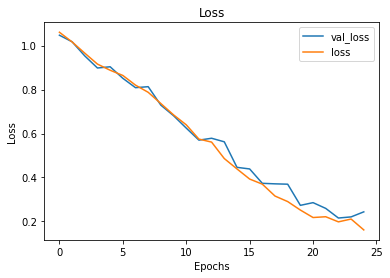

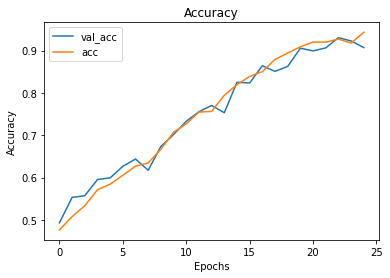

In [66]:
# call the visualization function
visualize_training_results(results_4)

The accuracy for both training and validation sets keeps increasing.
The loss function for both training and validation sets keeps decreasing.

In [67]:
# evaluate the model on X_test
test_loss, test_acc = model_4.evaluate(X_test,y_test)


40/40 [==============================] - 13s 332ms/step - loss: 0.2462 - acc: 0.9078


In [68]:
# predection
#y_test_pred = model_4.predict(X_test)
#y_test_pred

In [69]:
#y_val = keras.utils.to_categorical(y_val, 4)


In [70]:
#y_classes = [np.argmax(element) for element in y_test_pred]
#print('Predicted_values:',y_classes[:10])
#print('Actual_values:',y_test[:10])

We have an imbalance data problem.We will implement the data augmentation technique on our model to solve the problem.

Data augmentation, a technique for minority class oversampling, is widely used to increase the image recognition performance for deep learning 

In [71]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen =ImageDataGenerator(
        rotation_range=4,
        width_shift_range=0.2,
        height_shift_range=0.2,
        #rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [72]:

val_datagen = ImageDataGenerator() 

In [73]:
# compute quantities required for featurewise normalization

#datagen.fit(X_train)

In [74]:
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=128)
val_generator = val_datagen.flow(X_val, y_val, batch_size=128)

In [75]:

reults_5 = model_4.fit_generator(train_generator,
                              steps_per_epoch=len(X_train) // 128,
                              epochs=150,
                              validation_data=val_generator,
                              validation_steps=len(X_val) // 128)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/150
30/30 [==============================] - 109s 4s/step - loss: 1.1972 - acc: 0.4794 - val_loss: 1.0058 - val_acc: 0.4930
Epoch 2/150
30/30 [==============================] - 109s 4s/step - loss: 0.9844 - acc: 0.5219 - val_loss: 1.0255 - val_acc: 0.5492
Epoch 3/150
30/30 [==============================] - 106s 4s/step - loss: 0.9563 - acc: 0.5393 - val_loss: 0.9466 - val_acc: 0.5484
Epoch 4/150
30/30 [==============================] - 106s 4s/step - loss: 0.9525 - acc: 0.5414 - val_loss: 0.9484 - val_acc: 0.5477
Epoch 5/150
30/30 [==============================] - 106s 4s/step - loss: 0.9357 - acc: 0.5526 - val_loss: 0.9185 - val_acc: 0.5672
Epoch 6/150
30/30 [==============================] - 107s 4s/step - loss: 0.9224 - acc: 0.5576 - val_loss: 0.9257 - val_acc: 0.5555
Epoch 7/150
30/30 [==============================] - 106s 4s/step - loss: 0.9270 - acc: 0.5440 - val_loss: 0.9819 - val_acc: 0.5352


Epoch 61/150
30/30 [==============================] - 107s 4s/step - loss: 0.8513 - acc: 0.5742 - val_loss: 0.8138 - val_acc: 0.6070
Epoch 62/150
30/30 [==============================] - 107s 4s/step - loss: 0.8410 - acc: 0.5826 - val_loss: 0.7962 - val_acc: 0.6125
Epoch 63/150
30/30 [==============================] - 107s 4s/step - loss: 0.8335 - acc: 0.5805 - val_loss: 0.8371 - val_acc: 0.5953
Epoch 64/150
30/30 [==============================] - 110s 4s/step - loss: 0.8295 - acc: 0.5891 - val_loss: 0.8163 - val_acc: 0.6117
Epoch 65/150
30/30 [==============================] - 107s 4s/step - loss: 0.8370 - acc: 0.5859 - val_loss: 0.7809 - val_acc: 0.6289
Epoch 66/150
30/30 [==============================] - 108s 4s/step - loss: 0.8267 - acc: 0.5839 - val_loss: 0.7745 - val_acc: 0.6203
Epoch 67/150
30/30 [==============================] - 109s 4s/step - loss: 0.8307 - acc: 0.5852 - val_loss: 0.7716 - val_acc: 0.6289
Epoch 68/150
30/30 [==============================] - 108s 4s/step - 

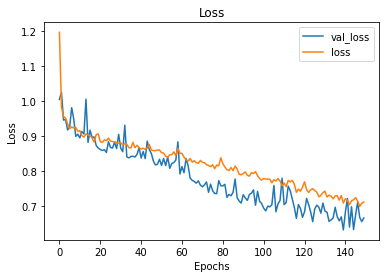

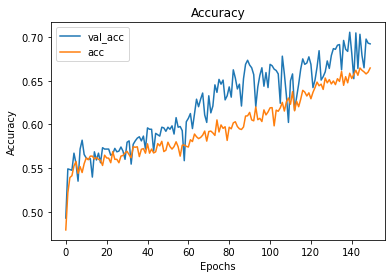

In [76]:
visualize_training_results(reults_5)

In [77]:
# evaluate the model on X_test
test_loss, test_acc = model_4.evaluate(X_test,y_test)


40/40 [==============================] - 13s 325ms/step - loss: 0.6315 - acc: 0.7133


underfiting to solve the problem we will increase the number of layers and reduce the number of drop out.

In [79]:
# predection
y_test_pred = model_4.predict(X_test)
y_test_pred

array([[4.8092843e-05, 5.1252469e-10, 9.5967859e-01, 4.0273409e-02],
       [9.3740076e-01, 7.1702152e-04, 6.9635403e-03, 5.4918781e-02],
       [5.6135249e-01, 1.1675943e-02, 1.0928619e-01, 3.1768540e-01],
       ...,
       [2.0484065e-01, 3.0212195e-03, 2.7954572e-01, 5.1259243e-01],
       [3.6103313e-04, 1.4909556e-08, 7.6186460e-01, 2.3777433e-01],
       [3.8450900e-01, 2.2009029e-03, 1.7727436e-01, 4.3601575e-01]],
      dtype=float32)

In [105]:
# create a Convolution network
model_5 = models.Sequential()
model_5.add(layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(100, 100, 3))),
model_5.add(layers.MaxPooling2D((2, 2))),

model_5.add(layers.Conv2D(100, (3, 3), activation='relu')),
model_5.add(layers.MaxPooling2D((2, 2))),
model_5.add(layers.Dropout(0.2)),
            
model_5.add(layers.Conv2D(100, (3, 3), activation='relu')),
model_5.add(layers.MaxPooling2D((2, 2))),
model_5.add(layers.Dropout(0.2)),

model_5.add(layers.Conv2D(100, (3, 3), activation='relu')),
model_5.add(layers.MaxPooling2D((2, 2))),
model_5.add(layers.Dropout(0.2)),



model_5.add(layers.Flatten()),
            
model_5.add(layers.Dense(64, activation='relu')),
model_5.add(layers.Dense(4, activation='softmax'))
            

In [106]:
# model summary
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 47, 47, 100)       28900     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 23, 23, 100)       0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 23, 23, 100)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 21, 21, 100)       90100     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 10, 10, 100)      

In [107]:
# compile model
model_5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [108]:
reults_6 = model_5.fit_generator(train_generator,
                              steps_per_epoch=len(X_train) // 128,
                              epochs=150,
                              validation_data=val_generator,
                              validation_steps=len(X_val) // 128)


Epoch 1/150
30/30 [==============================] - 139s 5s/step - loss: 1.0578 - acc: 0.4693 - val_loss: 1.0428 - val_acc: 0.4930
Epoch 2/150
30/30 [==============================] - 139s 5s/step - loss: 1.0320 - acc: 0.5005 - val_loss: 1.0288 - val_acc: 0.4930
Epoch 3/150
30/30 [==============================] - 139s 5s/step - loss: 1.0187 - acc: 0.5026 - val_loss: 1.0183 - val_acc: 0.5500
Epoch 4/150
30/30 [==============================] - 139s 5s/step - loss: 0.9975 - acc: 0.5182 - val_loss: 0.9690 - val_acc: 0.5133
Epoch 5/150
30/30 [==============================] - 139s 5s/step - loss: 0.9772 - acc: 0.5263 - val_loss: 0.9350 - val_acc: 0.5469
Epoch 6/150
30/30 [==============================] - 138s 5s/step - loss: 0.9624 - acc: 0.5391 - val_loss: 0.9605 - val_acc: 0.5367
Epoch 7/150
30/30 [==============================] - 152s 5s/step - loss: 0.9540 - acc: 0.5409 - val_loss: 0.9893 - val_acc: 0.5219
Epoch 8/150
30/30 [==============================] - 140s 5s/step - loss: 0.

30/30 [==============================] - 145s 5s/step - loss: 0.5736 - acc: 0.7383 - val_loss: 0.5357 - val_acc: 0.7523
Epoch 124/150
30/30 [==============================] - 143s 5s/step - loss: 0.5868 - acc: 0.7391 - val_loss: 0.5681 - val_acc: 0.7289
Epoch 125/150
30/30 [==============================] - 152s 5s/step - loss: 0.5675 - acc: 0.7451 - val_loss: 0.5022 - val_acc: 0.7820
Epoch 126/150
30/30 [==============================] - 138s 5s/step - loss: 0.5620 - acc: 0.7440 - val_loss: 0.4958 - val_acc: 0.7766
Epoch 127/150
30/30 [==============================] - 150s 5s/step - loss: 0.5815 - acc: 0.7370 - val_loss: 0.5256 - val_acc: 0.7602
Epoch 128/150
30/30 [==============================] - 138s 5s/step - loss: 0.5632 - acc: 0.7495 - val_loss: 0.5631 - val_acc: 0.7453
Epoch 129/150
30/30 [==============================] - 146s 5s/step - loss: 0.5577 - acc: 0.7526 - val_loss: 0.5125 - val_acc: 0.7773
Epoch 130/150
30/30 [==============================] - 139s 5s/step - loss: 

In [109]:
# evaluate the model on X_test
test_loss, test_acc = model_5.evaluate(X_test,y_test)


40/40 [==============================] - 17s 436ms/step - loss: 0.5882 - acc: 0.7617


In [110]:
# predection
y_test_pred = model_5.predict(X_test)
y_test_pred

array([[1.54924749e-07, 5.10819961e-17, 9.93282199e-01, 6.71764370e-03],
       [9.96910989e-01, 9.21640098e-09, 5.52625579e-06, 3.08344071e-03],
       [3.79358709e-01, 1.20803506e-07, 4.72988351e-04, 6.20168149e-01],
       ...,
       [5.44751644e-01, 1.15370448e-03, 2.79507279e-01, 1.74587369e-01],
       [5.60428743e-05, 1.82046306e-16, 5.26127815e-01, 4.73816097e-01],
       [6.93064511e-01, 1.10987575e-08, 1.40239401e-02, 2.92911589e-01]],
      dtype=float32)